In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [ ]:
data_dict = load_breast_cancer()

In [ ]:
data_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data = pd.DataFrame(data_dict['data'],columns= data_dict['feature_names'])
data['cancer_type'] = data_dict['target']
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.shape

(569, 31)

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from hyperopt import hp,fmin,tpe,Trials,space_eval
from functools import partial

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data[[i for i in data.columns if i != 'cancer_type']]
                                                 ,data['cancer_type']
                                                 ,stratify = data['cancer_type']
                                                 ,test_size=0.2
                                                 , random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Outcome,precision,recall,f1-score,support
0,0,0.926829,0.904762,0.915663,42.000000
1,1,0.945205,0.958333,0.951724,72.000000
2,accuracy,0.938596,0.938596,0.938596,0.938596
3,macro avg,0.936017,0.931548,0.933693,114.000000
4,weighted avg,0.938435,0.938596,0.938438,114.000000


We need to create a model with high recall so lowering the probability cutoff

In [ ]:
report = pd.DataFrame(metrics.classification_report(Y_test, [1  if i >= 0.4 else 0 for i in model.predict_proba(X_test)[:,1]],output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.926829,0.904762,0.915663,42.000000
1,1,0.945205,0.958333,0.951724,72.000000
2,accuracy,0.938596,0.938596,0.938596,0.938596
3,macro avg,0.936017,0.931548,0.933693,114.000000
4,weighted avg,0.938435,0.938596,0.938438,114.000000


In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.909091,0.952381,0.930233,42.000000
1,1,0.971429,0.944444,0.957746,72.000000
2,accuracy,0.947368,0.947368,0.947368,0.947368
3,macro avg,0.940260,0.948413,0.943990,114.000000
4,weighted avg,0.948462,0.947368,0.947610,114.000000


By plotting the tree, we can extract insights and create rules that can be validated by subject matter experts

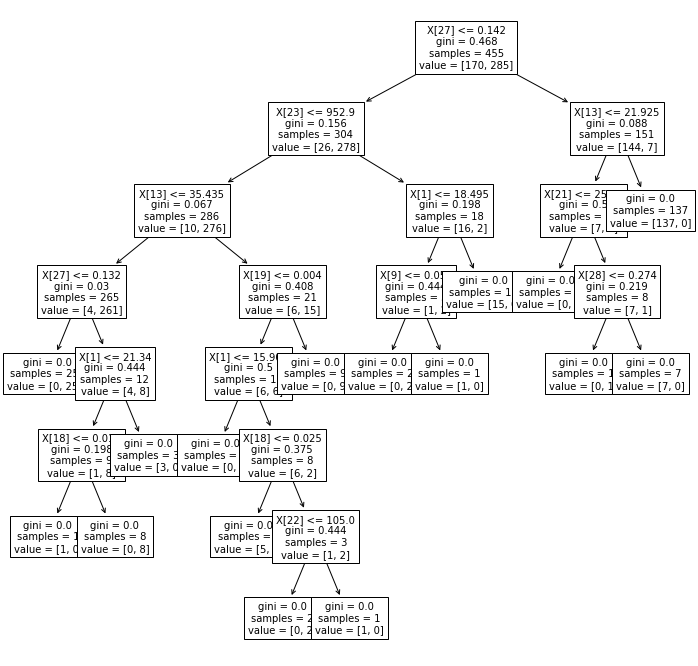

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model, fontsize=10)
plt.show()

In [ ]:
model = RandomForestClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.906977,0.928571,0.917647,42.000000
1,1,0.957746,0.944444,0.951049,72.000000
2,accuracy,0.938596,0.938596,0.938596,0.938596
3,macro avg,0.932362,0.936508,0.934348,114.000000
4,weighted avg,0.939042,0.938596,0.938743,114.000000


In [ ]:
model = SVC()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.944444,0.809524,0.871795,42.000000
1,1,0.897436,0.972222,0.933333,72.000000
2,accuracy,0.912281,0.912281,0.912281,0.912281
3,macro avg,0.920940,0.890873,0.902564,114.000000
4,weighted avg,0.914755,0.912281,0.910661,114.000000


In [ ]:
model = XGBClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.909091,0.952381,0.930233,42.000000
1,1,0.971429,0.944444,0.957746,72.000000
2,accuracy,0.947368,0.947368,0.947368,0.947368
3,macro avg,0.940260,0.948413,0.943990,114.000000
4,weighted avg,0.948462,0.947368,0.947610,114.000000


In [ ]:
model = KNeighborsClassifier()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.880952,0.880952,0.880952,42.000000
1,1,0.930556,0.930556,0.930556,72.000000
2,accuracy,0.912281,0.912281,0.912281,0.912281
3,macro avg,0.905754,0.905754,0.905754,114.000000
4,weighted avg,0.912281,0.912281,0.912281,114.000000


In [ ]:
model = GaussianNB()

model.fit(X_train,Y_train)
      
report = pd.DataFrame(metrics.classification_report(Y_test, model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
report

,Outcome,precision,recall,f1-score,support
0,0,0.883721,0.904762,0.894118,42.000000
1,1,0.943662,0.930556,0.937063,72.000000
2,accuracy,0.921053,0.921053,0.921053,0.921053
3,macro avg,0.913691,0.917659,0.915590,114.000000
4,weighted avg,0.921578,0.921053,0.921241,114.000000


In [ ]:
xgb_params = {'learning_rate'   : hp.choice('learning_rate',np.arange(0.05, 0.31, 0.05)),
              'max_depth'       : hp.choice('max_depth', np.arange(1, 16, 1, dtype=int)),
              'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
              'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 1.0, 0.1)),
              'subsample':        hp.uniform('subsample', 0.8, 1),
              'n_estimators':     hp.choice('n_estimators', np.arange(100, 500, 100, dtype=int))}

def xgb_objective_func(params,X_Data,Y_Data):
    model = XGBClassifier(**params)
    CV_pred = cross_val_predict(model,X_Data,Y_Data, cv=StratifiedKFold(n_splits=5),method='predict')
    accuracy = metrics.accuracy_score(Y_Data, CV_pred) #we can use recall aswell
    return -1*accuracy

fmin_objective = partial(xgb_objective_func,X_Data= X_train,Y_Data = Y_train)

xgb_tpe_best = fmin(fn=fmin_objective,
                space=xgb_params,
                algo=tpe.suggest,
                trials=Trials(),
                max_evals=10 )

xgb_hyperparams = space_eval(xgb_params, xgb_tpe_best)

xgb_model = XGBClassifier(**xgb_hyperparams)

xgb_model.fit(X_train,Y_train)

xgb_report = pd.DataFrame(metrics.classification_report(Y_test, xgb_model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
xgb_report

100%|██████████| 10/10 [00:03<00:00,  2.70it/s, best loss: -0.9714285714285714]


,Outcome,precision,recall,f1-score,support
0,0,0.952381,0.952381,0.952381,42.000000
1,1,0.972222,0.972222,0.972222,72.000000
2,accuracy,0.964912,0.964912,0.964912,0.964912
3,macro avg,0.962302,0.962302,0.962302,114.000000
4,weighted avg,0.964912,0.964912,0.964912,114.000000


XGB params for best accuracy are below

In [ ]:
xgb_hyperparams

{'colsample_bytree': 0.6000000000000001,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.8988925322801917}

In [ ]:
xgb_params = {'learning_rate'   : hp.choice('learning_rate',np.arange(0.05, 0.31, 0.05)),
              'max_depth'       : hp.choice('max_depth', np.arange(1, 16, 1, dtype=int)),
              'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
              'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 1.0, 0.1)),
              'subsample':        hp.uniform('subsample', 0.8, 1),
              'n_estimators':     hp.choice('n_estimators', np.arange(100, 500, 100, dtype=int))}

def xgb_objective_func(params,X_Data,Y_Data):
    model = XGBClassifier(**params)
    CV_pred = cross_val_predict(model,X_Data,Y_Data, cv=StratifiedKFold(n_splits=5),method='predict')
    #accuracy = metrics.accuracy_score(Y_Data, CV_pred)
    recall = metrics.recall_score(Y_Data, CV_pred)
    return -1*recall

fmin_objective = partial(xgb_objective_func,X_Data= X_train,Y_Data = Y_train)

xgb_tpe_best = fmin(fn=fmin_objective,
                space=xgb_params,
                algo=tpe.suggest,
                trials=Trials(),
                max_evals=50 )

xgb_hyperparams = space_eval(xgb_params, xgb_tpe_best)

xgb_model = XGBClassifier(**xgb_hyperparams)

xgb_model.fit(X_train,Y_train)

xgb_report = pd.DataFrame(metrics.classification_report(Y_test, xgb_model.predict(X_test),output_dict=True)).T.reset_index().rename(columns = {'index':'Outcome'})
xgb_report

100%|██████████| 50/50 [00:23<00:00,  2.14it/s, best loss: -0.9859649122807017]


,Outcome,precision,recall,f1-score,support
0,0,0.930233,0.952381,0.941176,42.00000
1,1,0.971831,0.958333,0.965035,72.00000
2,accuracy,0.956140,0.956140,0.956140,0.95614
3,macro avg,0.951032,0.955357,0.953106,114.00000
4,weighted avg,0.956505,0.956140,0.956245,114.00000
